In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
parentdir = os.path.dirname(os.getcwd())
sys.path.append(parentdir)

In [3]:
import dotenv
# load environment variables from `.env` file if it exists
# recursively searches for `.env` in all folders starting from work dir
dotenv.load_dotenv()

True

In [4]:
# images list return, save
import h5py
import matplotlib.pyplot as plt
from einops import rearrange
from phi.flow import *
import matplotlib.pyplot as plt
import numpy as np
from phi.vis import *
from src.utils import resolve_path

In [5]:
data_path = resolve_path('${WORKING_DIR}/*/*/*/*/*/*.h5', idx=-1, unique=False)
print(data_path)

/datasets/work/mlai-fsp-pdeemu/work/PDEBench/working/ns_sim_cmd/2022-06-04/14-20-40/device=GPU,jit=True,label=basic,mode=slurm,n_batch=10,profile=False,save_gif=False,save_images=False,seed=99,sim_name=nsi_2d/98/basic-99.h5


In [6]:
data_f = h5py.File(data_path, 'r')
data_f.keys()

<KeysViewHDF5 ['force', 'particles', 't', 'velocity']>

In [7]:
data_f['particles'].shape

(10, 99901, 256, 256, 1)

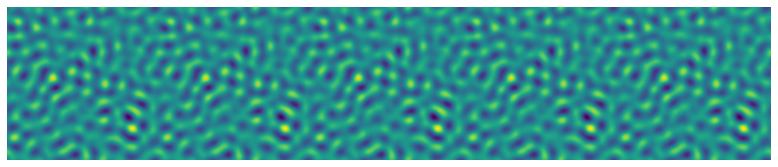

In [16]:

columns = 5
fsize = 12

arr = data_f['particles'][0, :columns, :, :, 0]

fig = plt.figure(figsize=(fsize, fsize/columns))
plt.imshow(rearrange(arr, 't x y -> x (t y)'))
plt.gca().set_axis_off()
plt.tight_layout(pad = 1)
plt.show()

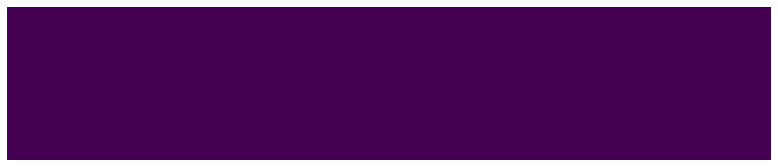

In [8]:

columns = 5
fsize = 12

arr = data_f['particles'][0, 1000:1000+columns, :, :, 0]

fig = plt.figure(figsize=(fsize, fsize/columns))
plt.imshow(rearrange(arr, 't x y -> x (t y)'))
plt.gca().set_axis_off()
plt.tight_layout(pad = 1)
plt.show()

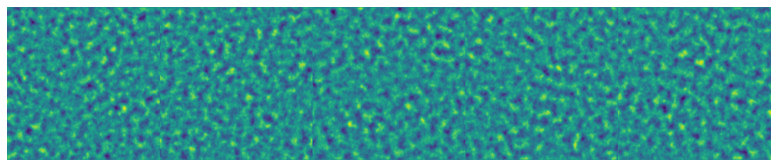

In [16]:

columns = 5
fsize = 12

arr = data_f['force'][:columns, :, :, 0]

fig = plt.figure(figsize=(fsize, fsize/columns))
plt.imshow(rearrange(arr, 'b x y -> x (b y)'))
plt.gca().set_axis_off()
plt.tight_layout(pad = 1)
plt.show()